# Import Lib & Data

In [21]:
#datayı import etmek ve düzenlemek için kütüphaneleri import ediyorum.
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [22]:
#datayı import edip copy alıyorum. Herhangi bir durumda datam bozulmasın diye.
data_mobil = pd.read_csv("Mobil.csv",
                         sep="\t",
                         encoding="utf-8",
                         low_memory=False,
                         header=0,
                         decimal=",")
df = data_mobil.copy()

In [23]:
#head ile data özetine bakıyorum. Datayı tanımak amaçlı.
df.head()

,Unnamed: 0,Unnamed: 0.1,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,...,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
0,0,0,1325,Yok,1.9,Yok,"2,0",Yok,50,0.1,...,10,499,695,2328.0,2,Var,Yok,Yok,Normal,Beyaz
1,1,1,1046,Var,2.8,Var,0.0,Var,58,0.2,...,0,259,1040,3863.0,9,Var,Var,Var,Pahalı,Pembe
2,2,2,843,Yok,1.3,Var,1.0,Yok,16,0.9,...,4,593,732,1734.0,14,Yok,Yok,Var,Ucuz,Mor
3,3,3,894,Yok,0.5,Var,"1,0",Var,50,0.5,...,14,1285,1462,3615.0,6,Var,Yok,Var,Pahalı,Turuncu
4,4,4,936,Yok,1.0,Yok,1.0,Yok,18,0.2,...,18,1330,1686,2391.0,3,Var,Var,Var,Normal,Beyaz


In [24]:
#unname columnu siliyorum. Gereksiz bulduğum için.
df.drop(df.filter(regex="Unname"),axis=1, inplace=True)

In [25]:
df.head()

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
0,1325,Yok,1.9,Yok,"2,0",Yok,50,0.1,146,1,10,499,695,2328.0,2,Var,Yok,Yok,Normal,Beyaz
1,1046,Var,2.8,Var,0.0,Var,58,0.2,100,8,0,259,1040,3863.0,9,Var,Var,Var,Pahalı,Pembe
2,843,Yok,1.3,Var,1.0,Yok,16,0.9,119,7,4,593,732,1734.0,14,Yok,Yok,Var,Ucuz,Mor
3,894,Yok,0.5,Var,"1,0",Var,50,0.5,199,3,14,1285,1462,3615.0,6,Var,Yok,Var,Pahalı,Turuncu
4,936,Yok,1.0,Yok,1.0,Yok,18,0.2,153,3,18,1330,1686,2391.0,3,Var,Var,Var,Normal,Beyaz


In [26]:
#Typleri kontrol ediyorum. Onkameraya baktığımda numericti fakat burda object diyor. Aynı şekilde Ram de öyle.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   BataryaGucu          2017 non-null   int64  
 1   Bluetooth            2017 non-null   object 
 2   MikroislemciHizi     2017 non-null   float64
 3   CiftHat              2017 non-null   object 
 4   OnKameraMP           2012 non-null   object 
 5   4G                   2017 non-null   object 
 6   DahiliBellek         2017 non-null   int64  
 7   Kalinlik             2017 non-null   float64
 8   Agirlik              2017 non-null   int64  
 9   CekirdekSayisi       2017 non-null   int64  
 10  ArkaKameraMP         2017 non-null   int64  
 11  CozunurlukYükseklik  2017 non-null   int64  
 12  CozunurlukGenislik   2017 non-null   int64  
 13  RAM                  2005 non-null   object 
 14  BataryaOmru          2017 non-null   int64  
 15  3G                   2013 non-null   o

## Duplicate Rows

In [27]:
#aynı satırları siliyorum.

df.drop_duplicates(inplace= True)

In [28]:
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import LabelEncoder

## Astype

In [29]:
#onkamerayı incelediğimde bazılarında 2.0 iken bazıları 2,0 idi. Onları düzenliyorum.
df["OnKameraMP"] = df["OnKameraMP"].str.replace(",", ".")

In [30]:
#onkamera ve Ram typelarını objectten floata dönüştürüyorum.
df['OnKameraMP']= df['OnKameraMP'].astype(str).astype(float)
df['RAM']= df['RAM'].astype(str).astype(float)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   BataryaGucu          2000 non-null   int64  
 1   Bluetooth            2000 non-null   object 
 2   MikroislemciHizi     2000 non-null   float64
 3   CiftHat              2000 non-null   object 
 4   OnKameraMP           1995 non-null   float64
 5   4G                   2000 non-null   object 
 6   DahiliBellek         2000 non-null   int64  
 7   Kalinlik             2000 non-null   float64
 8   Agirlik              2000 non-null   int64  
 9   CekirdekSayisi       2000 non-null   int64  
 10  ArkaKameraMP         2000 non-null   int64  
 11  CozunurlukYükseklik  2000 non-null   int64  
 12  CozunurlukGenislik   2000 non-null   int64  
 13  RAM                  1988 non-null   float64
 14  BataryaOmru          2000 non-null   int64  
 15  3G                   1996 non-null   o

In [32]:
#kategorik ve numerik columnları ayırıyorum.
cat_cols = df.select_dtypes("O").columns
num_cols = df.select_dtypes("number").columns

In [33]:
cat_cols

num_cols

Index(['Bluetooth', 'CiftHat', '4G', '3G', 'Dokunmatik', 'WiFi',
       'FiyatAraligi', 'Renk'],
      dtype='object')

Index(['BataryaGucu', 'MikroislemciHizi', 'OnKameraMP', 'DahiliBellek',
       'Kalinlik', 'Agirlik', 'CekirdekSayisi', 'ArkaKameraMP',
       'CozunurlukYükseklik', 'CozunurlukGenislik', 'RAM', 'BataryaOmru'],
      dtype='object')

#  EDA

## Pandas Profiling

Data hakkında analizleri hazırladığı için burdan yardım alıyorum. Outlierda burdan faydalanacağım.

In [34]:
profile = ProfileReport(df, title="Pandas Profiling Report")

In [35]:
profile.to_widgets()

Summarize dataset:   0%|          | 0/33 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [17]:
profile.to_file("Pandas_Profile_Report.html")

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Sweetviz

In [18]:
#dataprofoling uyguladığım için buna gerek yok
# importing sweetviz
#import sweetviz as sv
#analyzing the dataset
#report = sv.analyze(df)
#display the report
#report.show_html('Sweetviz_Report.html')

## Statics info, describe

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   BataryaGucu          2000 non-null   int64  
 1   Bluetooth            2000 non-null   object 
 2   MikroislemciHizi     2000 non-null   float64
 3   CiftHat              2000 non-null   object 
 4   OnKameraMP           1995 non-null   float64
 5   4G                   2000 non-null   object 
 6   DahiliBellek         2000 non-null   int64  
 7   Kalinlik             2000 non-null   float64
 8   Agirlik              2000 non-null   int64  
 9   CekirdekSayisi       2000 non-null   int64  
 10  ArkaKameraMP         2000 non-null   int64  
 11  CozunurlukYükseklik  2000 non-null   int64  
 12  CozunurlukGenislik   2000 non-null   int64  
 13  RAM                  1988 non-null   float64
 14  BataryaOmru          2000 non-null   int64  
 15  3G                   1996 non-null   o

In [36]:
#betimsel istatistik özeti için describedan faydalanıyorum.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BataryaGucu,2000.0,1238.518500,439.418206,501.0,851.75,1226.0,1615.25,1998.0
MikroislemciHizi,2000.0,1.522250,0.816004,0.5,0.70,1.5,2.20,3.0
OnKameraMP,1995.0,4.312281,4.342095,0.0,1.00,3.0,7.00,19.0
DahiliBellek,2000.0,32.046500,18.145715,2.0,16.00,32.0,48.00,64.0
Kalinlik,2000.0,0.501750,0.288416,0.1,0.20,0.5,0.80,1.0
Agirlik,2000.0,140.249000,35.399655,80.0,109.00,141.0,170.00,200.0
CekirdekSayisi,2000.0,4.520500,2.287837,1.0,3.00,4.0,7.00,8.0
ArkaKameraMP,2000.0,9.916500,6.064315,0.0,5.00,10.0,15.00,20.0
CozunurlukYükseklik,2000.0,645.108000,443.780811,0.0,282.75,564.0,947.25,1960.0
CozunurlukGenislik,2000.0,1251.515500,432.199447,500.0,874.75,1247.0,1633.00,1998.0


## X cat-num split

In [19]:
X= df

In [20]:
X_n= X[num_cols]
X_o = X[cat_cols]

## Missing

In [76]:
#eksik verilerin adedini ve veri içindeki yüzdeliğine bakıyorum.

In [77]:

def missing_values_table(X_n):
    mis_val = X_n.isnull().sum()
    mis_val_percent = 100 * X_n.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(X_n.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")
    return mis_val_table_ren_columns

In [78]:
missing_values_table(X_n)

Your selected dataframe has 12 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values
RAM,12,0.6
OnKameraMP,5,0.2


In [79]:
#3G kategorik değişken olduğu için eksik verileri other olarak tanımlıyorum.
X_o["3G"]=X_o["3G"].fillna("others")
X_o.isnull().sum()

<ipython-input-79-6cdf3b914501>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_o["3G"]=X_o["3G"].fillna("others")


Bluetooth       0
CiftHat         0
4G              0
3G              0
Dokunmatik      0
WiFi            0
FiyatAraligi    0
Renk            0
dtype: int64

In [80]:
#onkameramp eksik verileri numeric olduğu ve az eksik değer olduğu için median ile dolduruyorum.
median= X_n["OnKameraMP"].median()
X_n["OnKameraMP"]= X_n["OnKameraMP"].fillna(median)

<ipython-input-80-377adbebd338>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_n["OnKameraMP"]= X_n["OnKameraMP"].fillna(median)


In [81]:
#ram eksik verileri numeric olduğu ve az veri olduğu için median ile dolduruyorum.
median1= X_n["RAM"].median()
X_n["RAM"]=X_n["RAM"].fillna(median1)
X_n["RAM"].isnull().sum()

<ipython-input-81-e3be3417594a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_n["RAM"]=X_n["RAM"].fillna(median1)


0

In [82]:
X_n.isnull().sum()


BataryaGucu            0
MikroislemciHizi       0
OnKameraMP             0
DahiliBellek           0
Kalinlik               0
Agirlik                0
CekirdekSayisi         0
ArkaKameraMP           0
CozunurlukYükseklik    0
CozunurlukGenislik     0
RAM                    0
BataryaOmru            0
dtype: int64

## Outlier

In [83]:
# iqr

In [84]:
#aykırı değerleri satır bazında siliyorum.
import seaborn as sns

In [85]:
X_n.isnull().any()

BataryaGucu            False
MikroislemciHizi       False
OnKameraMP             False
DahiliBellek           False
Kalinlik               False
Agirlik                False
CekirdekSayisi         False
ArkaKameraMP           False
CozunurlukYükseklik    False
CozunurlukGenislik     False
RAM                    False
BataryaOmru            False
dtype: bool

In [21]:
#X_n
#iqr = (np.quantile(X_n, 0.75))-(np.quantile(X_n, 0.25))
#np.quantile(X_n, 0.75)+(1.5*iqr)

In [87]:
X_n.shape

(2000, 12)

In [88]:
Q1 = X_n.quantile(0.25)
Q3 = X_n.quantile(0.75)
IQR = Q3 - Q1

X_n = X_n[~((X_n <
                         (Q1 - 1.5 * IQR)) | (X_n >
                                              (Q3 + 1.5 * IQR)))]
#.any(axis=1)

In [89]:
X_n.isnull().sum()

BataryaGucu             0
MikroislemciHizi        0
OnKameraMP             18
DahiliBellek            0
Kalinlik                0
Agirlik                 0
CekirdekSayisi          0
ArkaKameraMP            0
CozunurlukYükseklik     2
CozunurlukGenislik      0
RAM                     0
BataryaOmru             0
dtype: int64

In [90]:
#aykırı değerleri boş veri olarak döndürüp bu verileri satır bazında sildim.
removed_index= X_n[X_n['OnKameraMP'].isnull()].index.tolist()
removed_index += X_n[X_n['CozunurlukYükseklik'].isnull()].index.tolist()

In [91]:
removed_index

[246,
 397,
 401,
 513,
 642,
 661,
 867,
 896,
 920,
 975,
 1048,
 1103,
 1126,
 1364,
 1459,
 1684,
 1740,
 1817,
 1115,
 1820]

In [92]:
X_n= X_n.drop(removed_index)
X_o= X_o.drop(removed_index)

In [93]:
X_n

,BataryaGucu,MikroislemciHizi,OnKameraMP,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru
0,1325,1.9,2.0,50,0.1,146,1,10,499.0,695,2328.0,2
1,1046,2.8,0.0,58,0.2,100,8,0,259.0,1040,3863.0,9
2,843,1.3,1.0,16,0.9,119,7,4,593.0,732,1734.0,14
3,894,0.5,1.0,50,0.5,199,3,14,1285.0,1462,3615.0,6
4,936,1.0,1.0,18,0.2,153,3,18,1330.0,1686,2391.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,689,2.9,3.0,7,0.8,147,2,6,487.0,722,1241.0,16
1996,1654,1.8,1.0,11,0.3,146,7,2,1184.0,1719,1070.0,14
1997,742,2.2,4.0,56,0.2,190,7,14,577.0,1359,3557.0,12
1998,704,2.2,4.0,53,0.2,186,6,6,251.0,1013,3653.0,15


## Target

In [94]:
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import LabelEncoder

In [95]:
#bağımlı değişkeni ayırıyorum.
target = X_o["FiyatAraligi"]

In [96]:
X_o.drop("FiyatAraligi", axis=1, inplace=True)

In [97]:
X_o

,Bluetooth,CiftHat,4G,3G,Dokunmatik,WiFi,Renk
0,Yok,Yok,Yok,Var,Yok,Yok,Beyaz
1,Var,Var,Var,Var,Var,Var,Pembe
2,Yok,Var,Yok,Yok,Yok,Var,Mor
3,Yok,Var,Var,Var,Yok,Var,Turuncu
4,Yok,Yok,Yok,Var,Var,Var,Beyaz
...,...,...,...,...,...,...,...
1995,Yok,Var,Var,Var,Yok,Yok,Siyah
1996,Yok,Yok,Yok,Var,Var,Var,Sarı
1997,Yok,Var,Yok,Yok,Var,Var,Turuncu
1998,Yok,Var,Yok,Var,Var,Var,Turkuaz


In [98]:
X_n.dtypes

BataryaGucu              int64
MikroislemciHizi       float64
OnKameraMP             float64
DahiliBellek             int64
Kalinlik               float64
Agirlik                  int64
CekirdekSayisi           int64
ArkaKameraMP             int64
CozunurlukYükseklik    float64
CozunurlukGenislik       int64
RAM                    float64
BataryaOmru              int64
dtype: object

In [99]:
X_n.dtypes.isnull().sum()

0

## Correlation

In [100]:
# kategorik -- cramers
# numeric -- pearsons

cramer’s V korelasyon katsayısı 0 ile 1 arasında değerler alır. Katsayı değerinin 0 olması iki değişken arasında ilişki olmadığını, 1 olması ise kusursuz/mükemmel bir ilişki olduğunu gösterir. Katsayı değeri arttıkça, ilişki güçlenir

In [101]:
from scipy import stats

In [102]:
#pandas profileden 4G ile 3G arasında yüksek korelasyon olduğunu gördüm.
#4G varsa zaten 3G de vardır diyerek 3G yi sildim.
X_o.drop('3G',
  axis='columns', inplace=True)

In [103]:
X_o

,Bluetooth,CiftHat,4G,Dokunmatik,WiFi,Renk
0,Yok,Yok,Yok,Yok,Yok,Beyaz
1,Var,Var,Var,Var,Var,Pembe
2,Yok,Var,Yok,Yok,Var,Mor
3,Yok,Var,Var,Yok,Var,Turuncu
4,Yok,Yok,Yok,Var,Var,Beyaz
...,...,...,...,...,...,...
1995,Yok,Var,Var,Yok,Yok,Siyah
1996,Yok,Yok,Yok,Var,Var,Sarı
1997,Yok,Var,Yok,Var,Var,Turuncu
1998,Yok,Var,Yok,Var,Var,Turkuaz


In [104]:
#pearson
# değer silmeyeceğim

## Encode

In [105]:
X_o.head()

,Bluetooth,CiftHat,4G,Dokunmatik,WiFi,Renk
0,Yok,Yok,Yok,Yok,Yok,Beyaz
1,Var,Var,Var,Var,Var,Pembe
2,Yok,Var,Yok,Yok,Var,Mor
3,Yok,Var,Var,Yok,Var,Turuncu
4,Yok,Yok,Yok,Var,Var,Beyaz


In [106]:
X_o["Renk"].nunique()

12

In [108]:
#object değerlere label encoding uyguladım.
le = LabelEncoder()
X_o=X_o.apply(lambda col:le.fit_transform(col))
X_o.head()

,Bluetooth,CiftHat,4G,Dokunmatik,WiFi,Renk
0,2,1,1,1,1,0
1,1,0,0,0,0,6
2,2,0,1,1,0,5
3,2,0,0,1,0,10
4,2,1,1,0,0,0


## Normalize/Scale

In [109]:
#modelde daha iyi çıktı vermesi için normalizasyon uyguluyorum.
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
X_n = mms.fit_transform(X_n)  #//Eğitim setine normalizasyon uygulamak
X_o = mms.fit_transform(X_o)  #//Test setine normalizasyon uygulamak

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt

In [111]:
X_n.shape

(1980, 12)

In [112]:
#ayırdığım kategorik ve numerik değişkenleri concat ediyorum.

In [113]:
X = np.concatenate((X_o, X_n), axis=1)

In [114]:
X

array([[1.        , 1.        , 1.        , ..., 0.13017356, 0.55371459,
        0.        ],
       [0.5       , 0.        , 0.        , ..., 0.36048064, 0.96392304,
        0.38888889],
       [1.        , 0.        , 1.        , ..., 0.15487316, 0.39497595,
        0.66666667],
       ...,
       [1.        , 0.        , 1.        , ..., 0.57343124, 0.88214858,
        0.55555556],
       [1.        , 0.        , 1.        , ..., 0.34245661, 0.90780331,
        0.72222222],
       [1.        , 1.        , 0.        , ..., 0.39252336, 0.53901657,
        0.33333333]])

In [115]:
target

0         Normal
1         Pahalı
2           Ucuz
3         Pahalı
4         Normal
          ...   
1995    Çok Ucuz
1996        Ucuz
1997      Pahalı
1998      Normal
1999      Normal
Name: FiyatAraligi, Length: 1980, dtype: object

In [116]:
#target için label encod ediyorum.
le = LabelEncoder()
target = le.fit_transform(target)
target

array([0, 1, 2, ..., 1, 0, 0])

## Split train-test

In [117]:
#birleştirdiğim X değeri ve target olan y değeri üzerinden split yapıyorum.

In [ ]:
from sklearn.model_selection import train_test_split

In [118]:
y = target

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    random_state=42)

In [120]:
y_train.shape

(1326,)

# Modeling

In [122]:
#Multiclassfication uygulayacağım.

In [123]:
X_train.shape

(1326, 18)

## KNeighborsClassifier

In [125]:
# KNeighborsClassifier sınıfını import ettik
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

knn_model = KNeighborsClassifier().fit(X_train, y_train)
knn_model

KNeighborsClassifier()

In [126]:
y_pred= knn_model.predict(X_test)
accuracy_score(y_test,y_pred) #ilkel skor

0.41131498470948014

In [127]:
#model tuning:
knn_params= {"n_neighbors": np.arange(1,50)}

knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn, knn_params, cv=10)
knn_cv.fit(X_train,y_train)


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [128]:
print("En iyi scor:"+ str(knn_cv.best_score_))
print("En iyi parametreler:"+ str(knn_cv.best_params_))


En iyi scor:0.5045226703121439
En iyi parametreler:{'n_neighbors': 47}


In [129]:
knn= KNeighborsClassifier(47)
knn_tuned= knn.fit(X_train, y_train)


In [130]:
accuracy_scoreknn =knn_tuned.score(X_test,y_test)

In [131]:
y_pred= knn_tuned.predict(X_test)
accuracy_score(y_test,y_pred)

0.5076452599388379

## Naive Bayes

In [133]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

In [134]:
nb= GaussianNB()
nb_model= nb.fit(X_train,y_train)
nb_model

GaussianNB()

In [135]:
nb_model.predict(X_test)[0:10]

array([0, 2, 3, 1, 0, 1, 2, 1, 1, 3])

In [136]:
nb_model.predict_proba(X_test)[0:10] #olasılık değerlerine erişebilirim.

array([[6.20292684e-01, 2.14192452e-02, 3.58015719e-01, 2.72351843e-04],
       [6.64072191e-02, 1.35049378e-04, 8.56693386e-01, 7.67643451e-02],
       [3.93650467e-03, 1.82446421e-07, 1.91346951e-01, 8.04716362e-01],
       [3.02295565e-01, 6.92092574e-01, 5.61185900e-03, 1.30652141e-09],
       [4.92834228e-01, 4.54383609e-01, 5.27819910e-02, 1.71928275e-07],
       [2.31514849e-02, 9.76826703e-01, 2.18121544e-05, 3.03450119e-16],
       [4.35555743e-01, 1.00830419e-03, 5.53316361e-01, 1.01195914e-02],
       [2.14086308e-01, 7.79820995e-01, 6.09269681e-03, 3.77837937e-10],
       [8.88690857e-02, 9.11077572e-01, 5.33423028e-05, 6.66485156e-15],
       [1.36541263e-02, 9.17051257e-07, 2.61946736e-01, 7.24398220e-01]])

In [137]:
y_pred= nb_model.predict(X_test)
accuracy_score(y_test,y_pred) #test hatası

0.8042813455657493

In [138]:
accuracy_scorenb= cross_val_score(nb_model, X_test, y_test, cv=10).mean()

In [139]:
accuracy_scorenb

0.8119580419580419

## Random Forest

In [140]:
from sklearn.ensemble import RandomForestClassifier

In [143]:
rf_model=RandomForestClassifier(n_estimators=100).fit(X_train,y_train)
rf_model


RandomForestClassifier()

In [144]:
y_pred= rf_model.predict(X_test)
accuracy_scorerf= accuracy_score(y_test,y_pred)

In [145]:
accuracy_scorerf

0.8807339449541285

## Gradient Boosting

In [146]:
from sklearn.ensemble import GradientBoostingClassifier

In [147]:
gbm_model= GradientBoostingClassifier().fit(X_train,y_train)

In [148]:
y_pred= gbm_model.predict(X_test)
accuracy_scoregb= accuracy_score(y_test,y_pred)

In [149]:
accuracy_scoregb

0.8960244648318043

# Modellerin Karşılaştırılması

In [157]:
modeller= [
    knn_tuned,
    nb_model,
    rf_model,
    gbm_model
]

In [159]:
for model in modeller:
    isimler= model.__class__.__name__
    #model
    y_pred= model.predict(X_test)
    dogruluk= accuracy_score( y_test, y_pred)
    print("-"*28)
    print(isimler + ":")
    print("Acccuracy: {:.4%}".format(dogruluk))

----------------------------
KNeighborsClassifier:
Acccuracy: 50.7645%
----------------------------
GaussianNB:
Acccuracy: 80.4281%
----------------------------
RandomForestClassifier:
Acccuracy: 88.0734%
----------------------------
GradientBoostingClassifier:
Acccuracy: 89.6024%


In [161]:
sonuc=[]
sonuclar= pd.DataFrame(columns=["modeller","accuracy"])

In [162]:
for model in modeller:
    isimler= model.__class__.__name__
    y_pred= model.predict(X_test)
    dogruluk= accuracy_score( y_test, y_pred)
    sonuc= pd.DataFrame([[isimler,dogruluk*100]],columns= ["modeller","accuracy"])
    sonuclar=sonuclar.append(sonuc)

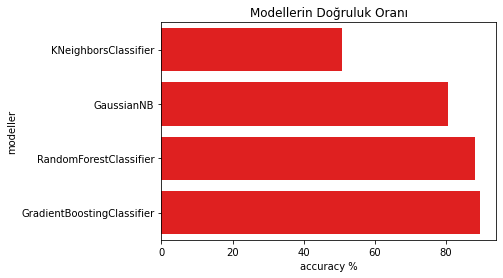

In [163]:
sns.barplot(x="accuracy",y="modeller",data=sonuclar, color="r")
plt.xlabel("accuracy %")
plt.title("Modellerin Doğruluk Oranı");

Grafikte de görüldüğü üzere benim tercih edeceğim model %89 başarı olasılığıyla Gradient Boosting Classifier olacaktır.
